### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий

### ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 5


#### Дисциплина: Методы машинного обучения

##### Студент: Мухамедияр Адиль
##### Группа: НКНбд-01-20

## Москва 2023
***

# Постановка задачи:

В соответствии с индивидуальным заданием, указанным в записной книжке команды, выполните следующие работы:  

1. При помощи модуля pandas_datareader считайте котировки указанной в индивидуальным задании акции за указанный период времени.

2. Визуализируйте котировки акции (столбец `Adj Close`) за весь период на графике. Подпишите оси и рисунок.

3. Вычислите и визуализируйте заданный показатель акции в соответствии с индивидуальным заданием.

4. Сформируйте обучающую, тестовую и валидационные выборки для обучения нейронной сети в соответствии с индивидуальным заданием.

5. Постройте нейронную сеть MLP с нормализующим слоем и одним плотным скрытым слоем из 16 нейронов для прогнозирования стоимости акции и обучите ее на обучающей выборке. Оцените качество прогнозирования при помощи заданного показателя качества на тестовой выборке.

6. Примените указанную в индивидуальном задании технику решения проблемы исчезающих градиентов и постройте нейронную сеть MLP с нормализующим слоем и тремя плотными скрытыми слоями из 16 нейронов для прогнозирования стоимости акции и обучите ее на обучающей выборке. Оцените качество прогнозирования при помощи заданного показателя качества для тестовой выборки.

7. Постройте рекуррентную нейронную сеть с нормализующим слоем и одним скрытым слоем LSTM из 16 нейронов для прогнозирования стоимости акции и обучите ее на обучающей выборке. Оцените качество прогнозирования при помощи заданного показателя качества на тестовой выборке.

8. Визуализируйте кривые обучения для трех построенных моделей на одном рисунке в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду. Используйте для визуализации относительную ошибку (ошибку обучения, деленную на начальную ошибку на первой эпохе).

9. Визуализируйте весь набор данных и прогнозы трех построенных моделей для обучающей и тестовой выборок на одном рисунке (ось X – даты, ось Y – стоимость акции), подписывая оси и рисунок и создавая легенду.

# Вариант №16



### Дополнение к основной задаче:

1. Считайте котировки акции с указанным тикером за 2019-2020 год: V Visa Inc

2. Показатель акции: дневная доходность, способ визуализации – эмпирическая CDF

3. Прогнозирование стоимости акции через 7 дней по данным за предыдущие 30 дней.

4. Показатель качества R2

5. Техника борьбы с исчезающими градиентами: Пакетная нормализация 

## Решение:

In [122]:
#!pip install yfinance

In [123]:
# Добавляем библиотеки, которыми мы воспользуемся в дальнейшем:
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
from tensorflow import keras
import yfinance as yfin
import tensorflow as tf
import datetime as dt
import pandas as pd
import numpy as np

### Пункт 1

Загрузим ежедневные котировки акции компании Visa Inc за 2019-2020 год:

In [124]:
yfin.pdr_override()
V = pdr.get_data_yahoo('V', 
                          start=dt.datetime(2019, 1, 1), 
                          end=dt.datetime(2020, 12, 31))
V.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,130.000000,133.740005,129.600006,132.919998,128.979111,8788000
2019-01-03,131.210007,131.279999,127.879997,128.130005,124.331139,9428300
2019-01-04,130.440002,134.589996,130.130005,133.649994,129.687454,11065800
2019-01-07,134.449997,137.169998,134.039993,136.059998,132.026047,12928000
2019-01-08,137.970001,138.190002,135.960007,136.800003,132.744080,9243000


### Пункт 2

Text(0, 0.5, 'Values')

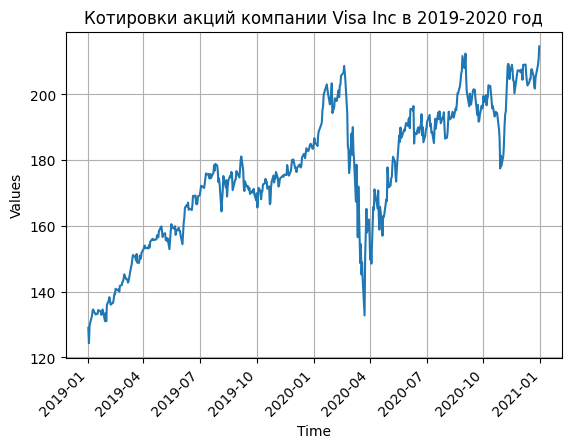

In [125]:
fig, ax = plt.subplots()
ax.plot(V['Adj Close'])
ax.grid(True)
ax.set_title("Котировки акций компании Visa Inc в 2019-2020 год")
ax.set_xlabel('Time')
fig.autofmt_xdate(rotation=45)
ax.set_ylabel('Values')

### Пункт 3

В качестве наиболее корректного показателя стоимости (цены) акции будем применять признак `Adj Close`. 

__Дневной доход__ по акции равен разности текущей цены акции и цены предыдущего дня. __Дневной убыток__ по акции равен разности цены предыдущего дня и текущей цены акции. __Дневная доходность__ по акции равна разности текущей цены акции и цены предыдущего дня, деленной на цену предыдущего дня. 

Произведем расчет дневных доходностей акции:

In [126]:
d_close = V[['Adj Close']]
d_pct_ch = d_close.pct_change()
d_pct_ch2 = d_close / d_close.shift(1) - 1
d_pct_ch2

,Adj Close
Date,
2019-01-02,NaN
2019-01-03,-0.036037
2019-01-04,0.043081
2019-01-07,0.018033
2019-01-08,0.005439
...,...
2020-12-23,-0.002623
2020-12-24,0.016561
2020-12-28,0.018831


In [127]:
d_pct_ch.describe()

,Adj Close
count,503.000000
mean,0.001225
std,0.020674
min,-0.135472
25%,-0.006954
50%,0.001831
75%,0.009929
max,0.138426


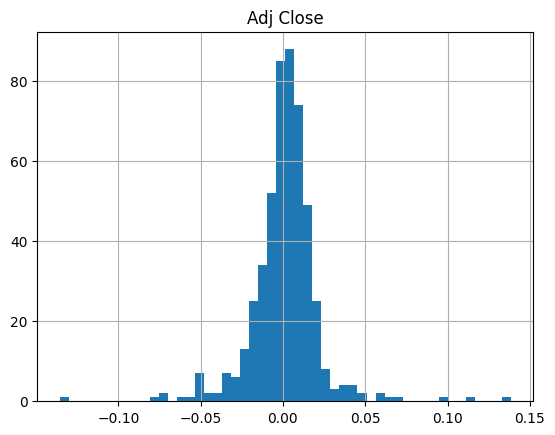

In [128]:
d_pct_ch.hist(bins=50); # Эмпирическая функция, дневная доходность(Oy) к дате(Ox)

### Пункт 4


In [129]:
# Определим некоторые параметры
sampling_rate = 1
sequence_length = 30
delay= 7
batch_size = 32

In [130]:
# Преобразуем данные в массив numpy
raw_data = V['Adj Close'].values
targets = raw_data[delay:]

Будем использовать первые 50% данных в наборе для обучения, следующие 25% для валидации и последние 25% для тестирования. Вычислим количество записей в обучающей, валидационной и тестовой выборках: 

In [131]:
num_train_samples = int(0.5 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)

num_train_samples: 252
num_val_samples: 126
num_test_samples: 126


Нормализуем каждый столбец в массиве `raw_data` по данным обучающей выборки (по первым `num_train_samples` записям), чтобы все столбцы принимали небольшие значения в одинаковом масштабе:

In [132]:
mean = raw_data[:num_train_samples].mean(axis=0)
raw_data -= mean
std = raw_data[:num_train_samples].std(axis=0)
raw_data /= std # whole raw_data normalized w.r.t. first num_train_samples rows

In [133]:
# Создаем обучающую выборку
train_dataset = tf.keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=targets,
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples)

# Создаем валидационную выборку
val_dataset = tf.keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=targets,
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples)

# Создаем тестовую выборку
test_dataset = tf.keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=targets,
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples + num_val_samples)

### Пункт 5


In [134]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_r2', patience=10)

In [135]:
inputs = tf.keras.Input(shape=(sequence_length, 1))
x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.BatchNormalization()(x)  
x = tf.keras.layers.Dense(16, activation="relu")(x)
outputs = tf.keras.layers.Dense(1)(x)
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history1 = model.fit(train_dataset, epochs=10, validation_data=val_dataset,callbacks=[callback])


Epoch 1/10
1/7 [===>..........................] - ETA: 4s - loss: 0.1200 - mae: 0.2558

7/7 [==============================] - 1s 37ms/step - loss: 0.1385 - mae: 0.2912 - val_loss: 0.8539 - val_mae: 0.7472
Epoch 2/10
1/7 [===>..........................] - ETA: 0s - loss: 0.2148 - mae: 0.4131

7/7 [==============================] - 0s 14ms/step - loss: 0.1364 - mae: 0.2917 - val_loss: 0.7806 - val_mae: 0.7150
Epoch 3/10
1/7 [===>..........................] - ETA: 0s - loss: 0.1055 - mae: 0.2714

7/7 [==============================] - 0s 11ms/step - loss: 0.1194 - mae: 0.2755 - val_loss: 0.8047 - val_mae: 0.7213
Epoch 4/10
1/7 [===>..........................] - ETA: 0s - loss: 0.0519 - mae: 0.1760

7/7 [==============================] - 0s 11ms/step - loss: 0.0763 - mae: 0.2220 - val_loss: 0.7700 - val_mae: 0.7050
Epoch 5/10
1/7 [===>..........................] - ETA: 0s - loss: 0.1088 - mae: 0.2908

7/7 [==============================] - 0s 11ms/step - loss: 0.1053 - mae: 0.2633 - val_loss: 0.7851 - val_mae: 0.7092
Epoch 6/10
1/7 [===>..........................] - ETA: 0s - loss: 0.0520 - mae: 0.1911

7/7 [==============================] - 0s 15ms/step - loss: 0.0826 - mae: 0.2329 - val_loss: 0.7502 - val_mae: 0.6934
Epoch 7/10
1/7 [===>..........................] - ETA: 0s - loss: 0.0952 - mae: 0.2564

7/7 [==============================] - 0s 12ms/step - loss: 0.1081 - mae: 0.2610 - val_loss: 0.6091 - val_mae: 0.6261
Epoch 8/10
1/7 [===>..........................] - ETA: 0s - loss: 0.0554 - mae: 0.1935

7/7 [==============================] - 0s 11ms/step - loss: 0.0747 - mae: 0.2204 - val_loss: 0.5908 - val_mae: 0.6174
Epoch 9/10
1/7 [===>..........................] - ETA: 0s - loss: 0.0921 - mae: 0.2540

7/7 [==============================] - 0s 14ms/step - loss: 0.1254 - mae: 0.2798 - val_loss: 0.6240 - val_mae: 0.6314
Epoch 10/10
1/7 [===>..........................] - ETA: 0s - loss: 0.1376 - mae: 0.3256

7/7 [==============================] - 0s 15ms/step - loss: 0.0926 - mae: 0.2454 - val_loss: 0.5777 - val_mae: 0.6086


In [136]:
# Показатель качества тестовой выборки
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

3/3 [==============================] - 0s 4ms/step - loss: 0.4989 - mae: 0.5662
Test MAE: 0.57


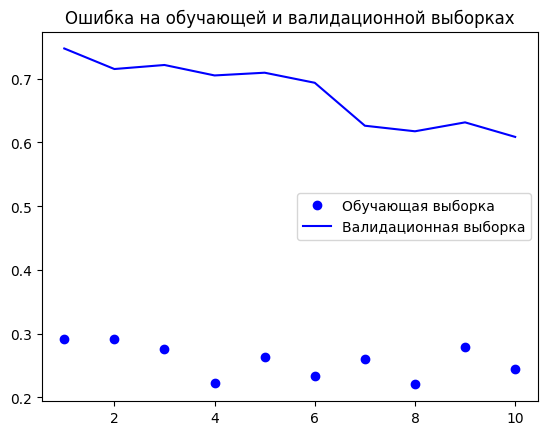

In [137]:
loss = history1.history["mae"]
val_loss = history1.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Обучающая выборка") # Для MAE
plt.plot(epochs, val_loss, "b", label="Валидационная выборка") # Для MAE
plt.title("Ошибка на обучающей и валидационной выборках") # Для MAE
plt.legend();

### Пункт 6


In [138]:
inputs = tf.keras.Input(shape=(sequence_length, 1))
x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.BatchNormalization()(x)  
x = tf.keras.layers.Dense(16, activation="relu",kernel_initializer="he_normal")(x)
x = tf.keras.layers.Dense(16, activation="relu",kernel_initializer="he_normal")(x)
x = tf.keras.layers.Dense(16, activation="relu",kernel_initializer="he_normal")(x)
outputs = tf.keras.layers.Dense(1)(x)
model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history2 = model_2.fit(train_dataset, epochs=15, validation_data=val_dataset,callbacks=[callback])

Epoch 1/15
1/7 [===>..........................] - ETA: 9s - loss: 2.9413 - mae: 1.4349

7/7 [==============================] - 2s 37ms/step - loss: 1.4687 - mae: 1.0125 - val_loss: 3.9624 - val_mae: 1.5371
Epoch 2/15
1/7 [===>..........................] - ETA: 0s - loss: 0.3584 - mae: 0.5270

7/7 [==============================] - 0s 11ms/step - loss: 0.2300 - mae: 0.3716 - val_loss: 2.3168 - val_mae: 1.0669
Epoch 3/15
1/7 [===>..........................] - ETA: 0s - loss: 0.1460 - mae: 0.3160

7/7 [==============================] - 0s 14ms/step - loss: 0.1398 - mae: 0.2902 - val_loss: 1.8777 - val_mae: 0.9175
Epoch 4/15
1/7 [===>..........................] - ETA: 0s - loss: 0.0843 - mae: 0.2247

7/7 [==============================] - 0s 17ms/step - loss: 0.1128 - mae: 0.2585 - val_loss: 1.6735 - val_mae: 0.8588
Epoch 5/15
1/7 [===>..........................] - ETA: 0s - loss: 0.0534 - mae: 0.1780

7/7 [==============================] - 0s 28ms/step - loss: 0.0605 - mae: 0.1864 - val_loss: 1.6570 - val_mae: 0.8760
Epoch 6/15
1/7 [===>..........................] - ETA: 0s - loss: 0.1066 - mae: 0.2615

7/7 [==============================] - 0s 28ms/step - loss: 0.0739 - mae: 0.2141 - val_loss: 1.4688 - val_mae: 0.8127
Epoch 7/15
1/7 [===>..........................] - ETA: 0s - loss: 0.0431 - mae: 0.1544

7/7 [==============================] - 0s 29ms/step - loss: 0.0505 - mae: 0.1749 - val_loss: 1.4562 - val_mae: 0.8244
Epoch 8/15
1/7 [===>..........................] - ETA: 0s - loss: 0.0528 - mae: 0.1849

7/7 [==============================] - 0s 29ms/step - loss: 0.0656 - mae: 0.2075 - val_loss: 1.3626 - val_mae: 0.8057
Epoch 9/15
1/7 [===>..........................] - ETA: 0s - loss: 0.0596 - mae: 0.1966

7/7 [==============================] - 0s 29ms/step - loss: 0.0823 - mae: 0.2341 - val_loss: 1.0437 - val_mae: 0.6726
Epoch 10/15
1/7 [===>..........................] - ETA: 0s - loss: 0.0401 - mae: 0.1629

7/7 [==============================] - 0s 29ms/step - loss: 0.0546 - mae: 0.1840 - val_loss: 1.1130 - val_mae: 0.7125
Epoch 11/15
1/7 [===>..........................] - ETA: 0s - loss: 0.0428 - mae: 0.1611

7/7 [==============================] - 0s 29ms/step - loss: 0.0694 - mae: 0.2077 - val_loss: 1.0125 - val_mae: 0.6726
Epoch 12/15
1/7 [===>..........................] - ETA: 0s - loss: 0.0273 - mae: 0.1239

7/7 [==============================] - 0s 14ms/step - loss: 0.0706 - mae: 0.1961 - val_loss: 0.9142 - val_mae: 0.6590
Epoch 13/15
1/7 [===>..........................] - ETA: 0s - loss: 0.0334 - mae: 0.1476

7/7 [==============================] - 0s 14ms/step - loss: 0.0743 - mae: 0.2115 - val_loss: 1.1636 - val_mae: 0.8213
Epoch 14/15
1/7 [===>..........................] - ETA: 0s - loss: 0.0464 - mae: 0.1842

7/7 [==============================] - 0s 14ms/step - loss: 0.0467 - mae: 0.1739 - val_loss: 0.8768 - val_mae: 0.6373
Epoch 15/15
1/7 [===>..........................] - ETA: 0s - loss: 0.0808 - mae: 0.2149

7/7 [==============================] - 0s 14ms/step - loss: 0.0624 - mae: 0.1973 - val_loss: 0.7425 - val_mae: 0.5789


In [139]:
# Показатель качества тестовой выборки
print(f"Test MAE: {model_2.evaluate(test_dataset)[1]:.2f}")

3/3 [==============================] - 0s 4ms/step - loss: 0.2313 - mae: 0.3901
Test MAE: 0.39


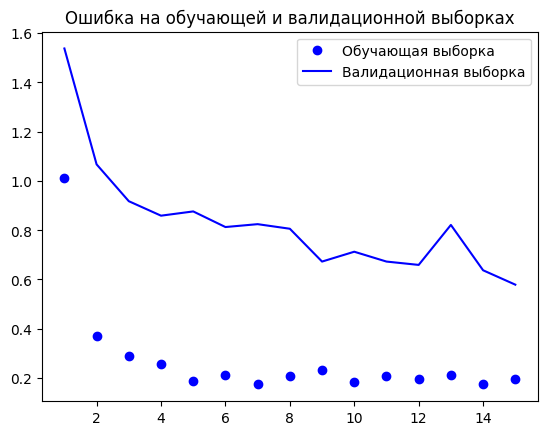

In [140]:
loss = history2.history["mae"]
val_loss = history2.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Обучающая выборка") # Для MAE
plt.plot(epochs, val_loss, "b", label="Валидационная выборка") # Для MAE
plt.title("Ошибка на обучающей и валидационной выборках") # Для MAE
plt.legend();

### Пункт 7

In [141]:
inputs = tf.keras.Input(shape=(sequence_length, 1))
x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.BatchNormalization()(x)  
x = tf.keras.layers.LSTM(16)(inputs) 
outputs = tf.keras.layers.Dense(1)(x)
model_3 = tf.keras.Model(inputs, outputs)

model_3.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history3 = model_3.fit(train_dataset,
                    epochs=15,
                    validation_data=val_dataset,
                    callbacks=[callback]
                   ) 


Epoch 1/15
6/7 [========================>.....] - ETA: 0s - loss: 0.7036 - mae: 0.7164 

7/7 [==============================] - 3s 180ms/step - loss: 0.7140 - mae: 0.7193 - val_loss: 2.5453 - val_mae: 1.3389
Epoch 2/15
5/7 [====================>.........] - ETA: 0s - loss: 0.5694 - mae: 0.6390

7/7 [==============================] - 0s 24ms/step - loss: 0.5306 - mae: 0.6055 - val_loss: 2.3608 - val_mae: 1.2875
Epoch 3/15
6/7 [========================>.....] - ETA: 0s - loss: 0.4124 - mae: 0.5227

7/7 [==============================] - 0s 24ms/step - loss: 0.4052 - mae: 0.5151 - val_loss: 2.1999 - val_mae: 1.2411
Epoch 4/15
6/7 [========================>.....] - ETA: 0s - loss: 0.2962 - mae: 0.4312

7/7 [==============================] - 0s 22ms/step - loss: 0.2978 - mae: 0.4269 - val_loss: 2.0638 - val_mae: 1.1988
Epoch 5/15
6/7 [========================>.....] - ETA: 0s - loss: 0.2157 - mae: 0.3574

7/7 [==============================] - 0s 37ms/step - loss: 0.2093 - mae: 0.3520 - val_loss: 1.9402 - val_mae: 1.1584
Epoch 6/15
6/7 [========================>.....] - ETA: 0s - loss: 0.1596 - mae: 0.3019

7/7 [==============================] - 0s 36ms/step - loss: 0.1515 - mae: 0.2966 - val_loss: 1.8420 - val_mae: 1.1258
Epoch 7/15
6/7 [========================>.....] - ETA: 0s - loss: 0.1321 - mae: 0.2864

7/7 [==============================] - 0s 22ms/step - loss: 0.1211 - mae: 0.2734 - val_loss: 1.7543 - val_mae: 1.0975
Epoch 8/15
7/7 [==============================] - ETA: 0s - loss: 0.1020 - mae: 0.2563

7/7 [==============================] - 0s 21ms/step - loss: 0.1020 - mae: 0.2563 - val_loss: 1.7126 - val_mae: 1.0845
Epoch 9/15
6/7 [========================>.....] - ETA: 0s - loss: 0.0894 - mae: 0.2410

7/7 [==============================] - 0s 21ms/step - loss: 0.0879 - mae: 0.2403 - val_loss: 1.6820 - val_mae: 1.0747
Epoch 10/15
6/7 [========================>.....] - ETA: 0s - loss: 0.0791 - mae: 0.2287

7/7 [==============================] - 0s 23ms/step - loss: 0.0760 - mae: 0.2225 - val_loss: 1.7355 - val_mae: 1.0900
Epoch 11/15
7/7 [==============================] - ETA: 0s - loss: 0.0668 - mae: 0.2090

7/7 [==============================] - 0s 22ms/step - loss: 0.0668 - mae: 0.2090 - val_loss: 1.7039 - val_mae: 1.0787
Epoch 12/15
6/7 [========================>.....] - ETA: 0s - loss: 0.0608 - mae: 0.1959

7/7 [==============================] - 0s 23ms/step - loss: 0.0601 - mae: 0.1950 - val_loss: 1.6763 - val_mae: 1.0692
Epoch 13/15
6/7 [========================>.....] - ETA: 0s - loss: 0.0553 - mae: 0.1859

7/7 [==============================] - 0s 23ms/step - loss: 0.0534 - mae: 0.1828 - val_loss: 1.6572 - val_mae: 1.0616
Epoch 14/15
6/7 [========================>.....] - ETA: 0s - loss: 0.0511 - mae: 0.1770

7/7 [==============================] - 0s 22ms/step - loss: 0.0487 - mae: 0.1728 - val_loss: 1.6266 - val_mae: 1.0511
Epoch 15/15
6/7 [========================>.....] - ETA: 0s - loss: 0.0441 - mae: 0.1623

7/7 [==============================] - 0s 23ms/step - loss: 0.0438 - mae: 0.1622 - val_loss: 1.6296 - val_mae: 1.0500


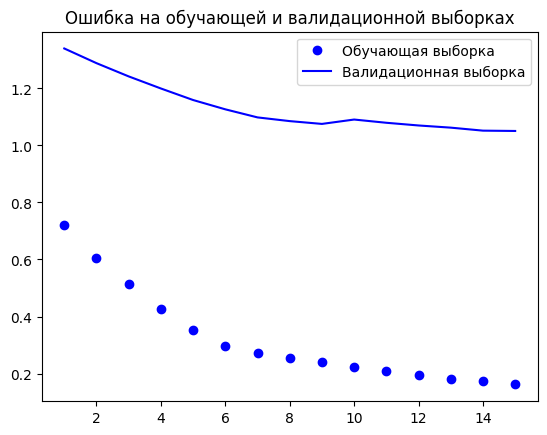

In [142]:
loss = history3.history["mae"]
val_loss = history3.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Обучающая выборка") # Для MAE
plt.plot(epochs, val_loss, "b", label="Валидационная выборка") # Для MAE
plt.title("Ошибка на обучающей и валидационной выборках") # Для MAE
plt.legend();

In [143]:
# Показатель качества тестовой выборки
print(f"Test MAE: {model_3.evaluate(test_dataset)[1]:.2f}")

3/3 [==============================] - 0s 7ms/step - loss: 3.0884 - mae: 1.6969
Test MAE: 1.70


### Пункт 8

ValueError: ignored

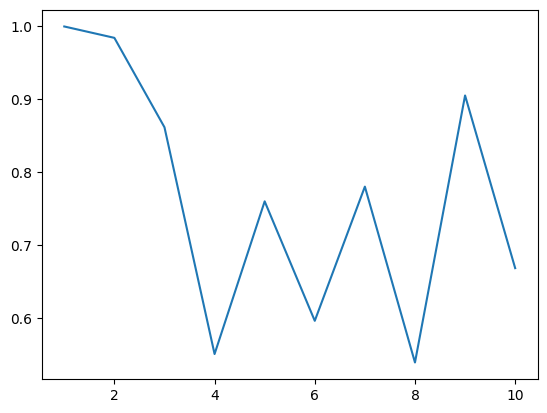

In [157]:
# Извлекаем историю потерь при обучении для каждой модели
model_1_train_loss = history1.history['loss']
model_2_train_loss = history2.history['loss']
model_3_train_loss = history3.history['loss']
# Вычисляем относительные потери при обучении для каждой модели
model_1_relative_loss = [loss / model_1_train_loss[0] for loss in model_1_train_loss]
model_2_relative_loss = [loss / model_2_train_loss[0] for loss in model_2_train_loss]
model_3_relative_loss = [loss / model_3_train_loss[0] for loss in model_3_train_loss]
# Строим кривые обучения
epochs = range(1, len(model_1_train_loss) + 1)
plt.plot(epochs, model_1_relative_loss, label='Model 1')
plt.plot(epochs, model_2_relative_loss, label='Model 2')
plt.plot(epochs, model_3_relative_loss, label='Model 3')
# Устанавливаем метки графика и условные обозначения
plt.xlabel('Epochs')
plt.ylabel('Relative Training Loss')
plt.title('Learning Curves')
plt.legend()
# Выводим график
plt.show()

### Пункт 9

In [145]:
dates = V.index
actual_data = V['Adj Close']

Получаем прогнозы для каждой модели в тестовой выборке

In [146]:
model_1_predictions_test = model.predict(test_dataset).reshape(-1)
model_2_predictions_test = model_2.predict(test_dataset).reshape(-1)
model_3_predictions_test = model_3.predict(test_dataset).reshape(-1)

3/3 [==============================] - 0s 5ms/step


Получаем прогнозы для каждой модели в обучающем наборе:

In [147]:
model_1_predictions_train = model.predict(train_dataset).reshape(-1)
model_2_predictions_train = model_2.predict(train_dataset).reshape(-1)
model_3_predictions_train = model_3.predict(train_dataset).reshape(-1)

7/7 [==============================] - 0s 5ms/step


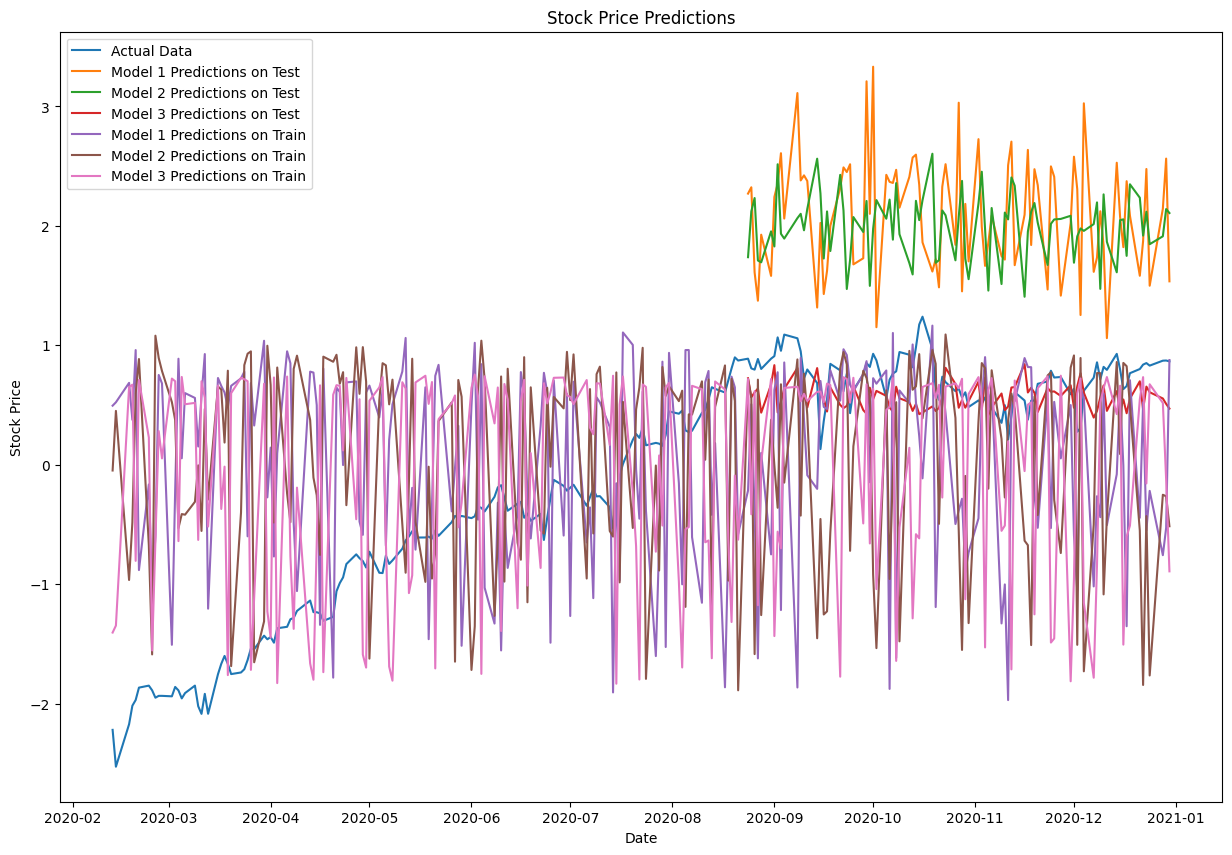

In [156]:
# Создаем новую фигуру:
plt.figure(figsize=(15, 10))
# Строим график всего набора данных:
plt.plot(dates[-len(model_1_predictions_train):], actual_data[:len(model_1_predictions_train)], label='Actual Data')
# Cтроим прогнозы для каждой модели в тестовом наборе:
plt.plot(dates[-len(model_1_predictions_test):], model_1_predictions_test, label='Model 1 Predictions on Test')
plt.plot(dates[-len(model_2_predictions_test):], model_2_predictions_test, label='Model 2 Predictions on Test')
plt.plot(dates[-len(model_3_predictions_test):], model_3_predictions_test, label='Model 3 Predictions on Test')
# Строим прогнозы для каждой модели на обучающем наборе:
plt.plot(dates[-len(model_1_predictions_train):], model_1_predictions_train, label='Model 1 Predictions on Train')
plt.plot(dates[-len(model_2_predictions_train):], model_2_predictions_train, label='Model 2 Predictions on Train')
plt.plot(dates[-len(model_3_predictions_train):], model_3_predictions_train, label='Model 3 Predictions on Train')
# Устанавливаем метки графика и условные обозначения:
plt.title('Stock Price Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()